In [2]:
import numpy as np
from matplotlib import pyplot as plt

def fixedLearningRate(r,alpha = 0.1):
    
    V = []
    for ii in range(len(r)):
        if ii == 0:
            V.append(r[ii])
        else:
            V.append(V[ii-1] + alpha*(r[ii] - V[ii-1]))

    return V

def playSlotMachine(p_win, T):
    
    r = []
    for i in range(T):
        r.append(np.random.binomial(1,p_win))
    
    return r

def predictionErrorModel(r):
    
    V = []
    for ii in range(len(r)):
        if ii == 0:
            V.append(r[ii])
        else:
            V.append(V[ii-1] + (1/ii)*(r[ii] - V[ii-1]))

    return V

def simpleModel(r):
    
    V = []
    for i in range(len(r)):
        V.append(np.mean(r[:i]))
    
    return V


In [3]:
#probability of winning
p_win = 0.4
# number of plays
T = 100
#roll the dice
r = playSlotMachine(p_win, T)

Text(0, 0.5, 'Reward')

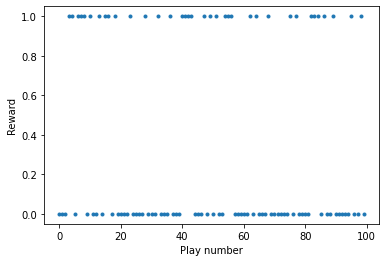

In [4]:
# Plot dice rolls
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r, '.')
ax.set_xlabel('Play number')
ax.set_ylabel('Reward')


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


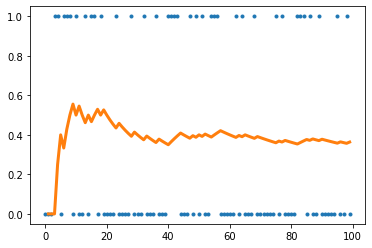

In [5]:
# compute values from simple model
V_simple = simpleModel(r)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r, '.')
ax.plot(V_simple, '-', linewidth= 3)

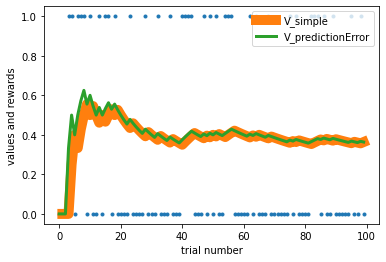

In [6]:
# simulate learning with the prediction error version of the averaging model
V_predictionError = predictionErrorModel(r)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r, '.')
ax.plot(V_simple, linewidth= 10,label = 'V_simple')
ax.plot(V_predictionError, linewidth= 3, label = 'V_predictionError')
ax.set_xlabel('trial number')
ax.set_ylabel('values and rewards')
ax.legend(loc= 'upper right')


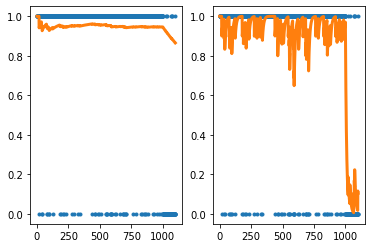

In [7]:
# shifting reward rate
r_bait = playSlotMachine(0.95, 1000)
r_switch = playSlotMachine(0.05, 100)
r = r_bait + r_switch

# simulate learning with the prediction error version of the averaging model
V_predictionError = predictionErrorModel(r)

# fixed learning rate model
V_fixed = fixedLearningRate(r)

# Plot difference
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(r, '.')
ax1.plot(V_predictionError,linewidth = 3,label = 'V_predictionError')

ax2 = fig.add_subplot(122)
ax2.plot(r, '.')
ax2.plot(V_fixed, linewidth = 3, label = 'V_fixed')

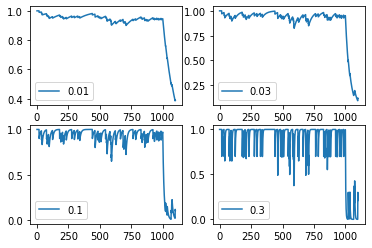

In [8]:
# impliment multiple rates

alpha_rates = [0.01, 0.03, 0.1, 0.3]
legends = ['0.01', '0.03', '0.1', '0.3']

fig = plt.figure()
for i,alpha in enumerate(alpha_rates):
  V_fixed = fixedLearningRate(r, alpha);
  ax = fig.add_subplot(2,2,i+1)
  ax.plot(V_fixed,label = legends[i])
  ax.legend()
